# Costal Systems Notebook 3a: Tidal Environments

In chapter 4 of the textbook, we looked into the global variation in the main processes that shape the coast: wind, waves, and tides. In this notebook, we will focus on the large-scale variation in tides. 
The two main variables on the basis of which tidal environments can be classified are:
- **Magnitude of the tide**, characterised by the tidal range;
- **Tidal character**, determined by the importance of diurnal vs. semi-diurnal components

In this notebook, we will explore both classifications using python code. Therefore, please import the libraries that we need for the analysis from the cell below.


In [1]:
# Run this to import modules

import pathlib
from pathlib import Path
import sys
from warnings import filterwarnings
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr
from datetime import datetime, timedelta
from IPython.display import display, Image
import math
import pandas as pd
import pooch

# This downloads the file from cloud storage to your pc. To avoid re-downloading it
# cachces the checksum to monitor if the file in the cloud has been modified.
F_data_fp = pooch.retrieve(
    "https://coclico.blob.core.windows.net/coastal-dynamics/02-tide/02_F_data.pkl",
    known_hash="eae7be0e7b44ed5b211e931bd6e5948e0aa8db067403956fe2d486f69e49c769",
)
F_data = pd.read_pickle(F_data_fp)

#cwd = pathlib.Path().resolve()
#proj_dir = cwd.parent.parent  # this is the root of the CoastalCodeBook
#DATA_DIR = proj_dir / "data"

<br><br>
## 1. Tidal Environments

The tidal wave is distorted by local differences in water depth and by the location and shape of land masses and large embayments. This results in a global variation in tidal range controlled by the large-scale coastal configuration. The tidal character expressed through mean spring tidal range:


|Category| Mean spring tidal range |
|----------------|:--:|
| Micro-tidal | < 2m | 
| Meso-tidal | 2m - 4m | 
| Macro-tidal | > 4m | 

<br>The tidal character, on the other hand, is defined by the form factor F: <center>*F = (K1 + O1)/(M2 + S2)*,</center>
where *K1*, *O1*, *M2*, and *S2* are the amplitudes of the corresponding tidal constituents. <br><br>

|Category| Value of F |
|----------------|:--:|
| Semidiurnal | 0 - 0.25 | 
| Mixed, mainly semidiurnal | 0.25 - 1.5 | 
| Mixed, mainly diurnal | 1.5 - 3 | 
| Diurnal | > 3 | 

<br> In the figure below, you can see the world distribution of mean spring tidal range (*left*) and tidal characters (*right*).
- Look into the semi-enclosed seas vs. open coasts; do you notice anything? Why?
- Compare the figure above with the figure below; what do you notice?

![image](../notebooks/figures/02_tidal_env.png)


<br><br><br>
## 2. Tidal Character at Specific Locations

Let's now categorize the tide at four specific locations. We will once again use the [FES2014 Global Tide data](https://www.aviso.altimetry.fr/en/data/products/auxiliary-products/global-tide-fes/description-fes2014.html), which provides amplitude and phase information for 34 tidal constituents, distributed on 1/16˚ grids.

The amplitudes of the constituents at each location are proved in the table below.

|Tidal amplitudes [cm]| M2 | S2 | K1 | O1 |
|----------------|:--:|:--:|:--:|----|
| Scheveningen   | 75.78 | 17.74 | 8.39  |  11.85 | 
| Galveston  | 13.08| 3.97  |  16.17 | 15.89 | 
| Valparaiso | 15.29 | 10.22 | 42.91  |  14.40 | 
| Jakarta | 4.78 |  4.96 |  25.62 | 13.29 |

<br> In cell below, write your own code to calculate the form factor *F* at each location.

In [2]:
# Write your code here. HINT: Use lists and a for loop for code simplicity

M2 = ...
S2 = ...
K1 = ...
O1 = ...
...

print(F)


NameError: name 'F' is not defined

In [2]:
# Run to get questions

print("\n What is the category of:")
from initialize.tide_initialize import init2
init2()

# keep the format of answers as in the tables above


 What is the category of:


<br><br>

Let's now plot the tidal characters across the globe obtained from the FES2014 dataset and mark the four locations from above. Do your answers match the locations on the map?

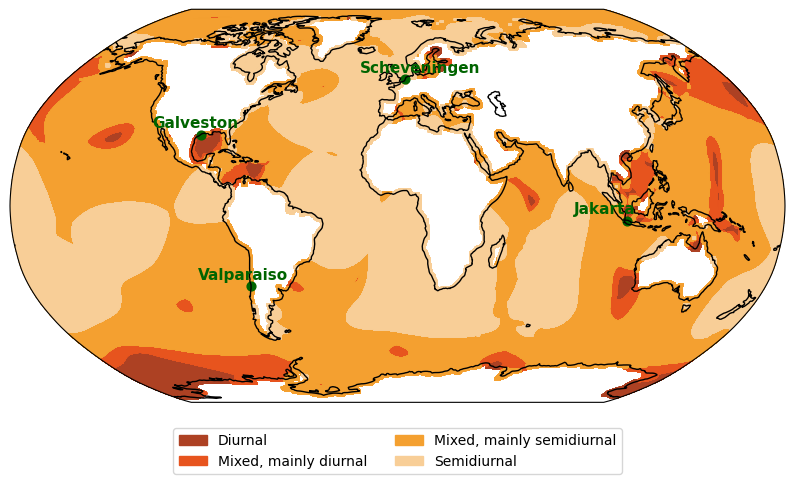

In [4]:
## FES2014 Tidal Characters
# the code is a bit slow!

# Define the categories and corresponding colors
categories = {
    'Diurnal': {'min': 3, 'max': float('inf'), 'color': '#ad4123'},
    'Mixed, mainly diurnal': {'min': 1.5, 'max': 2.9, 'color': '#e7541e'},
    'Mixed, mainly semidiurnal': {'min': 0.25, 'max': 1.49, 'color': '#f4a030'},
    'Semidiurnal': {'min': 0, 'max': 0.249, 'color': '#f8ce97'}
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 11), subplot_kw={'projection': ccrs.Robinson(central_longitude=0.0)})
ax.set_global()

# Plot the scatter points with specific colors for each category
legend_patches = []
for category, values in categories.items():
    subset_data = F_data[(F_data['F'] >= values['min']) & (F_data['F'] <= values['max'])]
    if not subset_data.empty:
        scatter = ax.scatter(subset_data.index.get_level_values('lon').values, 
                             subset_data.index.get_level_values('lat').values, s=1, color=values['color'], 
                             label=category, transform=ccrs.PlateCarree())
        legend_patches.append(Patch(color=scatter.get_facecolor()[0], label=category))

# Add markers for specific locations - here you can edit the code if you are wondering for a specific location
locs = {
    'Scheveningen': [4.25, 52.125],  # lon, lat
    'Galveston': [-94.6875, 29.25],
    'Valparaiso': [-71.625, -33],
    'Jakarta': [106.8125, -6.0625],
}

for loc, coordinates in locs.items():
    lon, lat = coordinates
    ax.scatter(lon, lat, color='darkgreen', s=40, transform=ccrs.PlateCarree())
    ax.text(lon - 25, lat+3, loc, color='darkgreen', fontsize=11, fontweight='bold', transform=ccrs.PlateCarree())

ax.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax.coastlines(resolution='110m', color='black')
plt.show()


<br><br>
Now that we've identified the tidal characteristics of each location, we can visualize their tidal constituents and address various questions.

Execute the block below to generate an interactive figure. You can adjust the plotted time range using the slider (from 1 day to 1 year) and select which tidal constituents to display with tick boxes. This allows you to experiment with different constituents, observe the resulting signals, and compare the locations.

The figure displays the individual tidal components (upper plot) and their combined tidal signal (second plot) for four locations,  each characterized by distinct tidal behaviors.

In [7]:
from initialize.tide_initialize import plot_4timeseries_with_interactive_controls


## Load FES2014

dates_fes = np.array([
    datetime(1977, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
    for item in range(24*365*40) #40 years
]) # 1977 - 2017

# Choose tidal constituents
comps = ['eps2', 'j1', 'k1', 'k2', 'l2', 'la2', 'm2', 'm3', 'm4', 'm6', 'm8', 'mf',
         'mm', 'mn4', 'ms4', 'msf', 'mtm', 'mu2', 'n2', 'nu2', 'o1', 'p1', 'q1',
         'r2', 's1', 's2', 's4', 'sa', 'ssa', 't2']

data_dir_path = Path("../data/fes2014_signal/")
tide_fes = {}
for comp in comps:
    fp = data_dir_path/("02_" + comp.lower() + ".p")
    tide_fes[comp] = pd.read_pickle(fp)
    tide_fes[comp].index = dates_fes

# Locations
locs = ['scheveningen', 'galveston', 'valparaiso', 'jakarta']

# Choose one year to plot (1977 - 2017)
dates = np.array([
    datetime(2013, 1, 1, 0, 0, 0) + timedelta(seconds=item * 3600)
    for item in range(24*365) #1 year
])

plot_4timeseries_with_interactive_controls(comps, dates, tide_fes, locs)



<br><br>
# Tidal Beating
Using the knowledge gained from Chapter 3 of the textbook and the interactive figure above, try to answer the questions below. You can use the next cell as a calculator.

In [ ]:
# Write your code here to get answers to questions 1 and 2. Use the table of principal constituents.

# T_group = 2*math.pi / (omega2-omega1) #equation 3.24b from the textbook
# omega2 = ?
# omega1 = ?
# T = ? [days]

print(T)

In [8]:
# Run to get questions 
from initialize.tide_initialize import init3
init3()

#1. Answer_A,B = ["m2", "s2"]
#   Answer_N = [14.77, 15]
#2. Answer_C,D = ["k1", "o1"]
#    Answer_M = [13.5, 14]
#3. Answer_M1,M2 = ["march", "september"]
#    Answer_E,F = ["s2", "k2"]
#4. Answer_M3,M4 = ["june", "december"]
#    Answer_G,H = ["k1", "p1"]

# the answers are interchangeable



1. In a semi-diurnal environment, spring tide occurs for tidal constituents A and B every N days. If you set the time range to around 30 days, which phenomenon can you detect when looking at the combined signal of these two constituents?




2. In a diurnal environment, spring tide occurs for tidal constituents C and D every M days. What is the main difference to the signal from question 1?




3. Strongest semi-diurnal tides are in the months M1 and M2, as can be seen from adding constituents E and F.




4. Strongest diurnal tides are in the months M3 and M4, as can be seen from adding constituents G and H.




5. The combinations we looked at above have periods of up to 2 weeks. But we also know that there are much longer variations. Set the time-range to 1 year and plot the combinations S2/K2 and K1/P1. What kind of combined signal can you see now?


6. Finally activate all components and analyse the total signal. What are the dominant components at each location? Why is the total tidal signal so different among locations?

